### 3D Grid in Configuration Space with Uniform Density
* 3D grid in configuration space: a discretized representation of the space of possible configurations of a system in three dimensions;
* configuration space: the space of all possible positions and orientations of the components of a system.

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.fft import fftn, fftfreq
import math as m

In [155]:
np.set_printoptions(threshold=np.inf)

1. Bounds and resolution

In [156]:
x_min,x_max,y_min,y_max,z_min,z_max=0,1,0,1,0,1
N=11 #number of points in each axis

2. Grid points

In [157]:
x=np.linspace(x_min,x_max,N)
y=np.linspace(y_min,y_max,N)
z=np.linspace(z_min,z_max,N)
delta=x[1]-x[0]

3. Meshgrid

In [158]:
X,Y,Z=np.meshgrid(x,y,z,indexing='ij')

4. Uniform density

In [159]:
density=1.0
densities=np.full_like(X,density) #I am creating an array (densities) with the same shape as the meshgrid (X) using np.full_like() to fill it with the value "density"

5. Plot

- 3D scatter plot

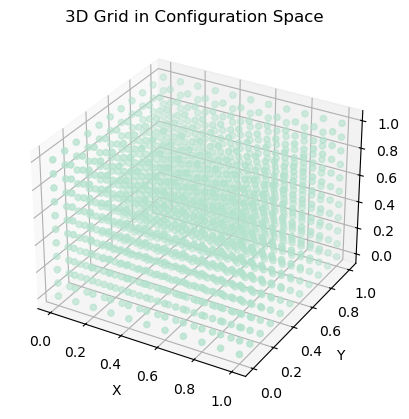

In [160]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X,Y,Z,c=densities,cmap='Pastel2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Grid in Configuration Space')
plt.show()

- Grid in the XY plane

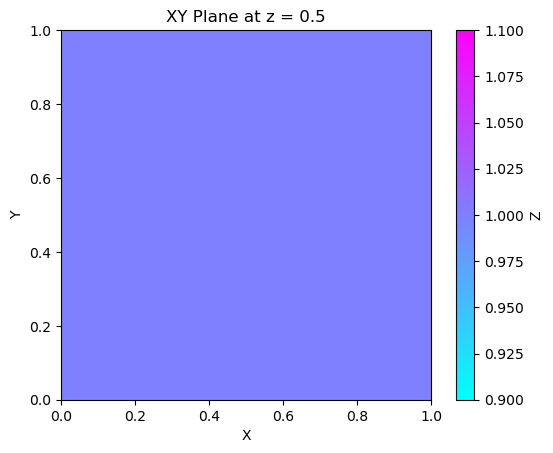

In [161]:
#I have to select a slice along the z-axix
z_i=5
densities_z_i=densities[:,:,z_i]

plt.imshow(densities_z_i,extent=[x_min,x_max,y_min,y_max],origin='lower',cmap='cool')
#plt.imshow(np.squeeze(Z[z_i]),extent=[x_min,x_max,y_min,y_max],origin='lower',vmin=z_min,vmax=z_max,cmap='GnBu')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('XY Plane at z = {}'.format(z[z_i]))
plt.colorbar(label='Z')
#plt.imshow(densities_z_i,extent=[x_min,x_max,y_min,y_max],origin='lower',cmap='magma',alpha=0.5)
plt.show()

### Fourier Transform
- The *fftn()* function computes the multidimensional FFT of an input array
- The *fftfreq()* function generates the frequencies associated with the Fourier Transform output
- *frequency_i* corresponds to the frequencies at which the signal's components oscillate in the frequency domain

In [162]:
fourier_transform=fftn(densities)

frequency_x,frequency_y,frequency_z=fftfreq(N,delta),fftfreq(N,delta),fftfreq(N,delta)
print(frequency_x)

[ 0.          0.90909091  1.81818182  2.72727273  3.63636364  4.54545455
 -4.54545455 -3.63636364 -2.72727273 -1.81818182 -0.90909091]


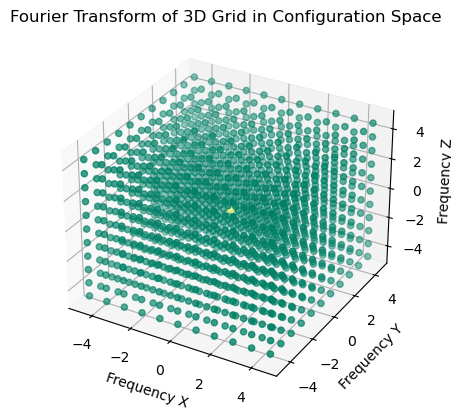

In [163]:
freq_X, freq_Y, freq_Z = np.meshgrid(frequency_x, frequency_y, frequency_z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(freq_X, freq_Y, freq_Z, c=np.abs(fourier_transform), cmap='summer')
ax.set_xlabel('Frequency X')
ax.set_ylabel('Frequency Y')
ax.set_zlabel('Frequency Z')
ax.set_title('Fourier Transform of 3D Grid in Configuration Space')
plt.show()

### Analysis
The points have the *same magnitude and color* throughout frequency space, which indicates that the Fourier Transform is reflecting the uniform density of the original grid, while the yellow spot at the center represents the *DC component*.

It is important to recall that the Fourier Transform of a constant function (which represents a uniform distribution of density) results in a *Dirac delta function centered at zero frequency*. This means that the Fourier Transform will have a **peak at the center of the frequency space**, corresponding to the DC component of the signal.

### Power Spectrum

The power spectrum is a representation of the distribution of power (or energy) contained in a signal as a function of frequency.

It is typically obtained by taking the squared magnitude of the Fourier Transform of a signal, so if $F(f)$ represents the Fourier Transform of a signal $f(t)$, then the power spectrum $P(f)$ is given by:

$$ P(f) = |F(f)|^2 $$

The power spectrum provides valuable information about the frequency components present in a signal and their respective magnitudes: it helps in identifying dominant frequencies, distinguishing between noise and signal components, and analyzing the overall characteristics of the signal in the frequency domain.

In practical terms, the power spectrum is often visualized as a plot with frequency on the x-axis and power (or amplitude squared) on the y-axis. It allows to identify peaks corresponding to dominant frequencies and analyze the distribution of power across different frequency bands.

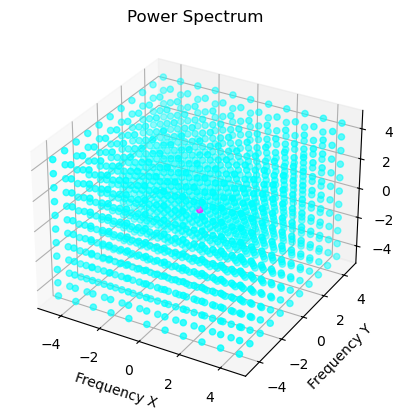

In [164]:
power_spectrum=np.abs(fourier_transform)**2
#print(power_spectrum)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(freq_X, freq_Y, freq_Z, c=power_spectrum, cmap='cool')
ax.set_xlabel('Frequency X')
ax.set_ylabel('Frequency Y')
ax.set_zlabel('Frequency Z')
ax.set_title('Power Spectrum')
plt.show()

### Analysis
It seems that there is a *dominant peak in the center of the frequency space*, which suggests that there is a strong signal component at the zero frequency (DC component) or very low frequencies. This is in agreement with the plot of the Fourier transform.

### 1D Power Spectrum

- Fundamental and Nyquist frequency

In [165]:
kf=2*m.pi/N
kN=2*m.pi/delta
print(kf,kN)

0.5711986642890533 62.83185307179586


- Absolute value of k

In [166]:
abs_k=np.sqrt(freq_X**2+freq_Y**2+freq_Z**2)
#print(abs_k)

- Scatter plot of the absolute value of k

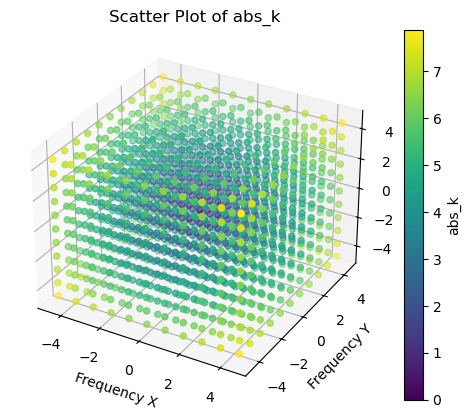

In [167]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(freq_X, freq_Y, freq_Z, c=abs_k.flatten(), cmap='viridis')
fig.colorbar(scatter, label='abs_k')
ax.set_xlabel('Frequency X')
ax.set_ylabel('Frequency Y')
ax.set_zlabel('Frequency Z')
ax.set_title('Scatter Plot of abs_k')
plt.show()

- `abs_k_range`: an array that determins the range (with a specific spacing, $k_f$) in which the modulus of $k$ can vary 

In [168]:
k_min=kf
k_max=kN
abs_k_range=np.arange(k_min,k_max,kf)
#print(abs_k_range)

- Histogram of `abs_k` using `abs_k_range` to specify the bin edges

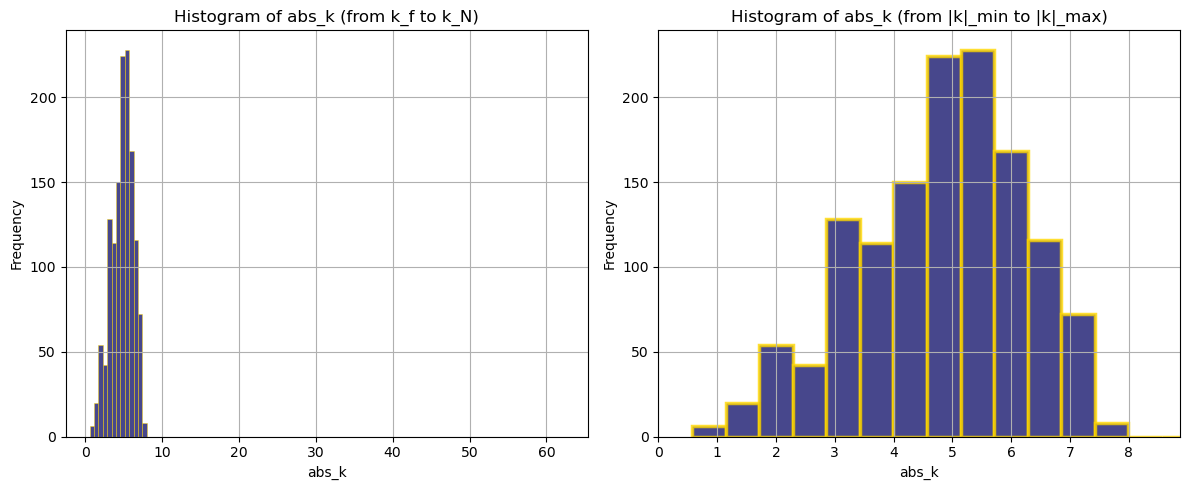

In [169]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(abs_k.flatten(), bins=abs_k_range, color='midnightblue', edgecolor='gold', alpha=0.8, linewidth=0.4)
plt.xlabel('abs_k')
plt.ylabel('Frequency')
plt.title('Histogram of abs_k (from k_f to k_N)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(abs_k.flatten(), bins=abs_k_range, color='midnightblue', edgecolor='gold', alpha=0.8, linewidth=2.5)
plt.xlabel('abs_k')
plt.ylabel('Frequency')
plt.title('Histogram of abs_k (from |k|_min to |k|_max)')
plt.grid(True)
plt.xlim(np.min(abs_k.flatten()), np.max(abs_k.flatten()) + 1)

plt.tight_layout()
plt.show()

**N.B.**: `abs_k_range` contains much higher frequencies than those in `abs_k`, so I expect that most values of |k| will be contained in the first components of the array `abs_k_range`.

In [170]:
'''
Pk=[None]*len(abs_k_range)
for i in range(len(abs_k_range)-1):
    for k_mod in abs_k.flatten():
        if k_mod>abs_k_range[i] and k_mod<abs_k_range[i+1]:
'''

'\nPk=[None]*len(abs_k_range)\nfor i in range(len(abs_k_range)-1):\n    for k_mod in abs_k.flatten():\n        if k_mod>abs_k_range[i] and k_mod<abs_k_range[i+1]:\n'

- `k_indices`: an array where each element corresponds to a bin index for the absolute values of $k$. In particular, the function `np.digitize()` bins $|k|$ based on the range determined by `abs_k_range`.

In [171]:
k_indices=np.digitize(abs_k,abs_k_range)-1 #,right=True)
#print(k_indices)

**N.B.**: `k_indices` contains a negative value ($k_{indices}$[0,0,0]=-1), so firstly I have to make sure that $k_{indices}$[0,0,0] becomes $\geq 0 \quad \rightarrow \quad$ I do this by imposing $k_{indices}$[0,0,0]=0.

In [172]:
#print(k_indices[0,0,0])
k_indices[k_indices < 0] = 0
#print(k_indices[0,0,0])

- Power spectrum

    1. Power spectrum for each unique k_index:
        - in general, the function `np.bincount()` counts the times when there is a non-negative integer in an array;
        - **np.bincount(k_indices.flatten(), weights=power_spectrum.flatten())** calculates the weighted sum of power values for each unique *k_index* in the `k_indices` array.

    2. Normalization of the power spectrum by the number of counts for each *k_index* to get the average.

    3. Creation of the bins for plotting:
        - `np.unique(k_indices.flatten())` identifies all unique $|k|$ indices present in `k_indices`;
        - `np.arange(len(unique_k_indices))` generates a sequence of integers from 0 to the number of unique $|k|$ indices (minus one), which serves as the bin indices for plotting.
        
    4. Plot of the power spectrum vs $|k|$ index.

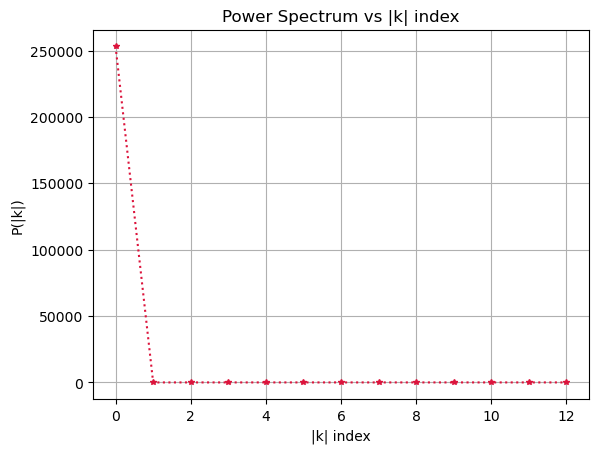

In [173]:
#1.
power_spectrum_k = np.bincount(k_indices.flatten(), weights=power_spectrum.flatten())
#print(k_indices.flatten())
#print(power_spectrum.flatten())

#2.
counts = np.bincount(k_indices.flatten())
power_spectrum_k /= counts
#print(power_spectrum_k)

#3.
unique_k_indices = np.unique(k_indices.flatten())
bins = np.arange(len(unique_k_indices))

#4.
plt.figure()
plt.plot(unique_k_indices, power_spectrum_k, marker='*', markersize=4, linestyle=':', color='crimson')
plt.xlabel('|k| index')
plt.ylabel('P(|k|)')
plt.title('Power Spectrum vs |k| index')
plt.grid(True)
plt.show()

*Addition*: `np.bincount(k_indices.flatten(), weights=abs_k.flatten()) / counts` calculates the average $|k|$ for each bin (weighting the counts using the corresponding $|k|$ values) and then dividing by the total counts.

$\quad \rightarrow \quad$ Plot of the power spectrum vs $|k|$

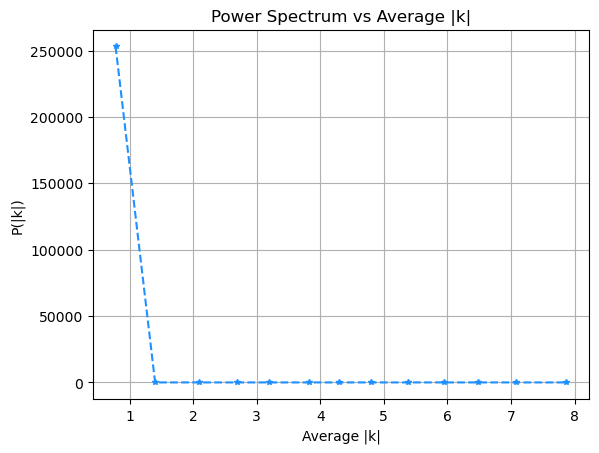

In [174]:
avg_abs_k = np.bincount(k_indices.flatten(), weights=abs_k.flatten()) / counts

plt.figure()
plt.plot(avg_abs_k, power_spectrum_k, marker='*', markersize=4, linestyle='--', color='dodgerblue')
plt.xlabel('Average |k|')
plt.ylabel('P(|k|)')
plt.title('Power Spectrum vs Average |k|')
plt.grid(True)
plt.show()